In [178]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import minmax_scale
%matplotlib inline

In [154]:
batch_file = '../data/orig_data/mturk_results/Batch_3848359_batch_results.csv'
check_file = '../data/orig_data/human_reduced_results.csv'

df = pd.read_csv(batch_file)
df['HITname'] = [row.split('/')[-1].split('.png')[0] for i,row in df['Input.image_url'].items()]

dfh = pd.read_csv(check_file)
print(dfh.shape)
dfh = dfh.loc[dfh['class']<=4,:]
print(dfh.shape)
dfh.head()


dfh['mp'] = minmax_scale(dfh['M'], feature_range=(0, 100))
dfh['ap'] = minmax_scale(dfh['A'], feature_range=(0, 100))

dfh1 = dfh.pivot(index='fileName', columns='class', values=['mp', 'ap']).reset_index()
dfh1.columns = ['%s%s' % (a, '.%s' % b if b else '') for a, b in dfh1.columns]

df = dfh1.merge(df, left_on='fileName', right_on='HITname')
df



(1648, 7)
(939, 7)


,fileName,mp.1,mp.2,mp.3,mp.4,ap.1,ap.2,ap.3,ap.4,HITId,...,Last7DaysApprovalRate,Input.image_url,Input.i,Answer.Separability1,Answer.Separability2,Answer.Separability3,Answer.Separability4,Approve,Reject,HITname
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,3,73,76,76,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes_Gli...
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,3,83,84,85,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes_Gli...
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,3,72,69,79,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes_Gli...
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,3,77,80,80,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes_Gli...
4,JavierGeneratedData_3dinterleaved_3classes_Gli...,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,3,83,81,79,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes_Gli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,yeast_PCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3XD2A6FGFNZ19TKGFLGD1MR088YS9F,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,9,7,12,7,9.0,NaN,NaN,yeast_PCA
236,yeast_PCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3XD2A6FGFNZ19TKGFLGD1MR088YS9F,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,9,72,79,41,31.0,NaN,NaN,yeast_PCA
237,yeast_PCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3XD2A6FGFNZ19TKGFLGD1MR088YS9F,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,9,30,22,11,12.0,NaN,NaN,yeast_PCA
238,yeast_PCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3XD2A6FGFNZ19TKGFLGD1MR088YS9F,...,0% (0/0),https://scatterplots.s3.eu-central-1.amazonaws...,9,13,14,27,14.0,NaN,NaN,yeast_PCA


In [198]:


df_agg = df.groupby(['HITname']).agg({
                    'Answer.Separability1':{'mean', 'std', 'count', scipy.stats.sem}, 
#                     'Answer.Separability2':{'mean', 'std'},
#                     'Answer.Separability3':{'mean', 'std'},
#                     'Answer.Separability4':{'mean', 'std'}, 
                    'WorkTimeInSeconds': {'min', 'max', 'median', 'mean'},
                    'mp.1':'min', 
                    'ap.1':'min'}).reset_index()

df_agg.columns = ['%s%s' % (a, '.%s' % b if b else '') for a, b in df_agg.columns]

# h = df_agg['Answer.Separability1']['sem'] * scipy.stats.t.ppf((1 + confidence) / 2., 
#                                           df_agg['Answer.Separability1']['count']-1)


print(df_agg.shape)
df_agg.head()



(48, 11)


,HITname,Answer.Separability1.mean,Answer.Separability1.sem,Answer.Separability1.std,Answer.Separability1.count,WorkTimeInSeconds.mean,WorkTimeInSeconds.median,WorkTimeInSeconds.min,WorkTimeInSeconds.max,mp.1.min,ap.1.min
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,77.6,2.357965,5.272571,5,72.8,77,38,115,100.0,100.0
1,JavierGeneratedData_3dinterleaved_5classes_RobPCA,37.6,8.494704,18.994736,5,46.4,33,13,119,75.0,100.0
2,JavierGeneratedData_3dinterleaved_5classes_tSNE,88.4,4.456456,9.964939,5,66.8,51,17,130,75.0,100.0
3,abalone_GlimmerMDS,7.2,2.222611,4.969909,5,51.4,48,26,88,0.0,0.0
4,boston_GlimmerMDS,56.0,12.505999,27.964263,5,50.6,30,25,108,100.0,75.0


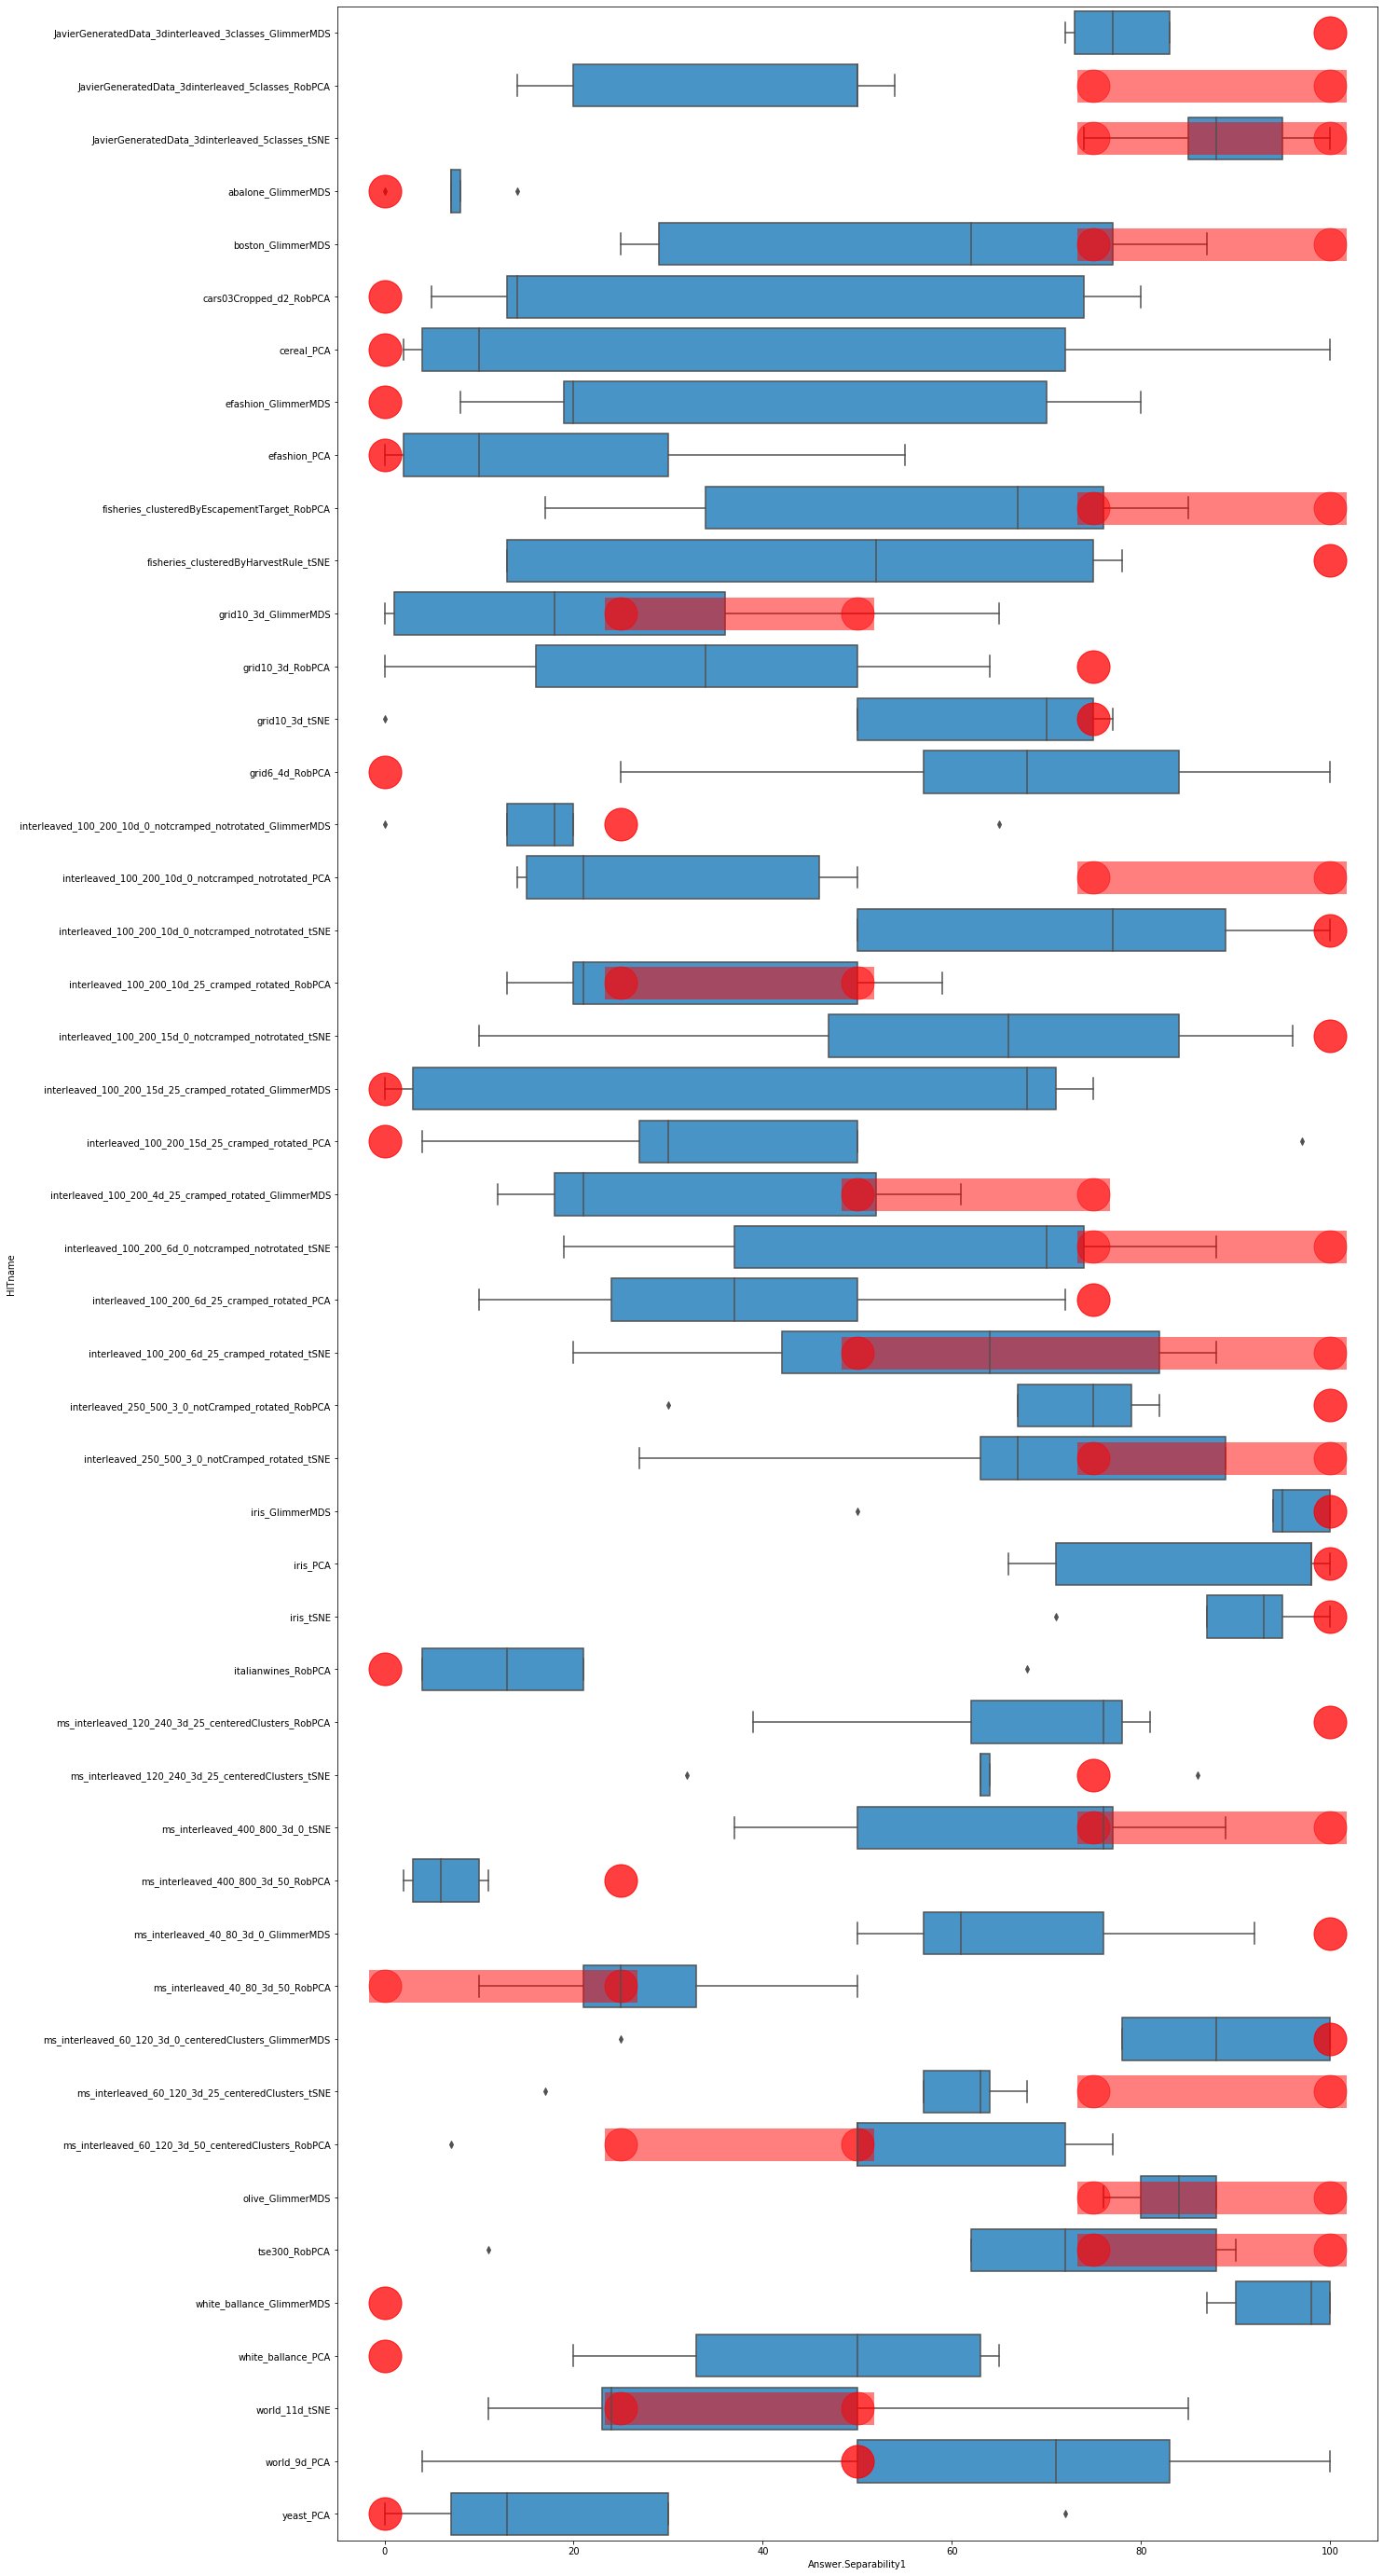

In [169]:
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
sns.boxplot(y="HITname", x="Answer.Separability1", 
            data=df, orient="h", ax=ax, color="#3498db")


for i in range(len(df_agg)):
    ax.plot( [df_agg.loc[i, 'mp.1.min'], df_agg.loc[i, 'ap.1.min']], [i,i], 'o-', 
            markersize=35, color='red', linewidth=35, alpha = 0.5) 

In [171]:
df.columns

Index(['fileName', 'mp.1', 'mp.2', 'mp.3', 'mp.4', 'ap.1', 'ap.2', 'ap.3',
       'ap.4', 'HITId', 'HITTypeId', 'Title', 'Description', 'Keywords',
       'Reward', 'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.image_url',
       'Input.i', 'Answer.Separability1', 'Answer.Separability2',
       'Answer.Separability3', 'Answer.Separability4', 'Approve', 'Reject',
       'HITname'],
      dtype='object')

Percentage of peopler between (0,12): 0.0
Percentage of peopler between (12,30): 0.27
Percentage of peopler between (30,45): 0.22
Percentage of peopler between (45,60): 0.11
Percentage of peopler between (60,180): 0.44


62.84166666666667

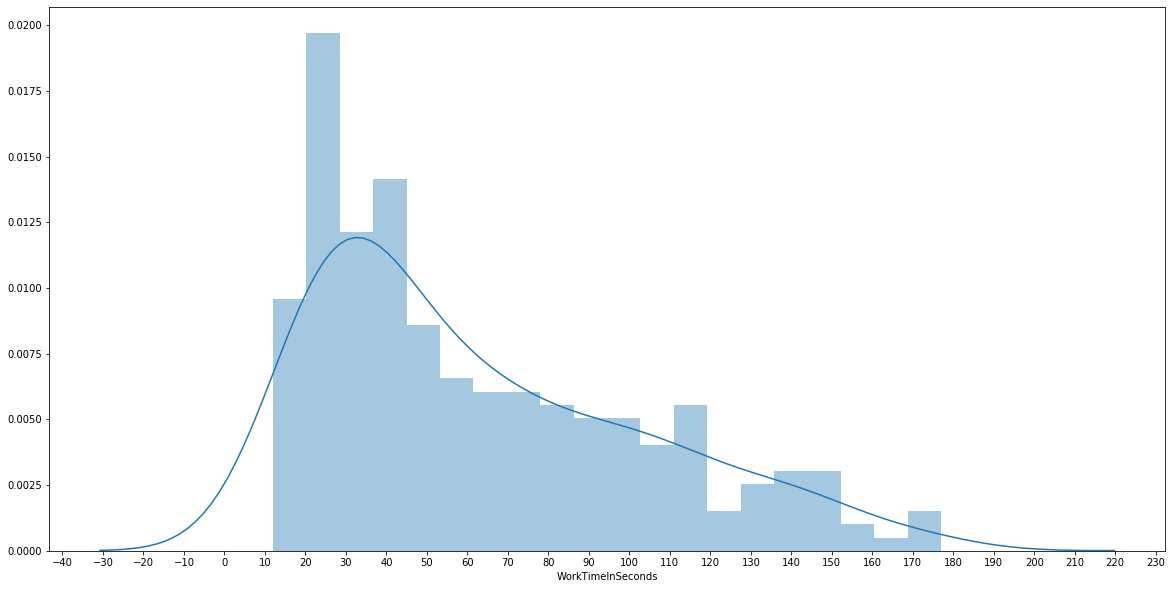

In [197]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.distplot(df.WorkTimeInSeconds,bins=20, ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ll = [0, 12, 30,45, 60, 180]
for i,number in enumerate(ll):
    if i == 0:
        continue
    print('Percentage of peopler between ({},{}): {}'.format(ll[i-1], ll[i],
        round(len(df.loc[df.WorkTimeInSeconds.between(ll[i-1], ll[i])])/len(df), 2)))
    
    


In [229]:
def stats(df):
    print(np.mean(df.WorkTimeInSeconds))
    print(np.median(df.WorkTimeInSeconds))
    print(scipy.stats.sem(df.WorkTimeInSeconds))
    print(len(set(df.WorkerId)))
    print('----')
    
n=10
workers = df.groupby(['WorkerId']).agg({'Answer.Separability1':'count'}) \
        .reset_index() \
        .sort_values(['Answer.Separability1'], ascending=False)
workers = list(workers.loc[workers["Answer.Separability1"]>n, 'WorkerId'])    
    
stats(df.loc[df.WorkerId.isin(workers), :])



n=15
workers = df.groupby(['WorkerId']).agg({'Answer.Separability1':'count'}) \
        .reset_index() \
        .sort_values(['Answer.Separability1'], ascending=False)
workers = list(workers.loc[workers["Answer.Separability1"]>n, 'WorkerId'])    
    
stats(df.loc[df.WorkerId.isin(workers), :])


stats(df)

67.04137931034482
57.0
3.3786272669547963
9
----
70.4578313253012
60.0
4.44347068608752
4
----
62.84166666666667
51.0
2.601402312439754
53
----


In [235]:
ww = pd.read_csv('/Users/morarica/Downloads/User_51161_workers.csv')
ww['UPDATE-already worked for me'] = np.ones(len(ww))

ww[['Worker ID', 'UPDATE-already worked for me']].to_csv('/Users/morarica/Downloads/1111.csv', index=False)

In [232]:
ww

,Worker ID,Link to Individual Worker Page,Number of HITs approved or rejected - Lifetime,Number of HITs approved - Lifetime,Your Lifetime approval rate,Number of HITs approved or rejected - Last 30 days,Number of HITs approved - Last 30 days,Your Last 30 days approval rate,Number of HITs approved or rejected - Last 7 days,Number of HITs approved - Last 7 days,Your Last 7 days approval rate,CURRENT-already worked for me,UPDATE-already worked for me,CURRENT BlockStatus,UPDATE BlockStatus,BlockReason
0,A13ZHVAT64KXAX,https://requestersandbox.mturk.com/workers/A13...,1,1,100.00%,1,1,100.00%,0,0,0.00%,NaN,NaN,Never Blocked,NaN,NaN
1,A1R5C4KJ0FELZQ,https://requestersandbox.mturk.com/workers/A1R...,22,22,100.00%,22,22,100.00%,10,10,100.00%,NaN,NaN,Never Blocked,NaN,NaN


In [223]:
df.WorkerId is in workers

df.WorkerId.str.contains()

SyntaxError: invalid syntax (<ipython-input-223-b6f41a083271>, line 1)